# ***Analisis de exploracion de datos RMCAB para calidad del aire en Bogotá***

## *1. Importar bibliotecas y bases de datos*

In [4]:
#Librerias
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [11]:
#Importar archivo consolidado
#Ruta Drive Ronadl /content/drive/MyDrive/Semestre 4/RNA/Proyecto RNA/Entrega 1 Descriptivo/Insumos/DataFramePandas.csv
path = '/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/DataFramePandas.csv'
df = pd.read_csv(path)
df.head()

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%)
0,2015-01-01 01:00:00,Guaymaral,40,19.2,21.3,15.8,37.1,NaN,----,1.1,0.3,347,8,564,0,0,NaN,82.58
1,2015-01-01 02:00:00,Guaymaral,51,41,10.9,18.6,29.5,NaN,----,2.3,0.6,353,8.6,564,0,0,NaN,83.11
2,2015-01-01 03:00:00,Guaymaral,153,118.3,3.9,17.2,21.1,NaN,----,2.1,0.6,17,8.3,564,0,0,NaN,82.91
3,2015-01-01 04:00:00,Guaymaral,120,94.3,6.1,13.6,19.8,NaN,----,2.2,0.6,27,7.8,564,0,0,NaN,82.73
4,2015-01-01 05:00:00,Guaymaral,57,40.2,12.5,12.7,25.1,NaN,----,1.3,0.4,357,6.7,564,0,0,NaN,82.36


In [12]:
print('El DataFrame está compuesto por {:,}'.format(df.shape[0]),'filas y',df.shape[1],'columnas')
print('Con información distribuida en las siguientes variables:', df.columns)
print('Las variables almacenan la información en el siguiente formato:', df.dtypes)

El DataFrame está compuesto por 1,430,828 filas y 18 columnas
Con información distribuida en las siguientes variables: Index(['DateTime', 'Estacion', 'PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)',
       'NO2(ppb)', 'NOX(ppb)', 'SO2(ppb)', 'CO(ppm)', 'OZONO(ppb)',
       'Vel Viento(m/s)', 'Dir Viento(Grados)', 'Temperatura(°C)',
       'Presion Baro(mmHg)', 'Rad Solar(W/M²)', 'Precipitacion(mm)',
       'CO2(ppm)', 'HR(%)'],
      dtype='object')
Las variables almacenan la información en el siguiente formato: DateTime              object
Estacion              object
PM10(µg/m3)           object
PM2.5(µg/m3)          object
NO(ppb)               object
NO2(ppb)              object
NOX(ppb)              object
SO2(ppb)              object
CO(ppm)               object
OZONO(ppb)            object
Vel Viento(m/s)       object
Dir Viento(Grados)    object
Temperatura(°C)       object
Presion Baro(mmHg)    object
Rad Solar(W/M²)       object
Precipitacion(mm)     object
CO2(ppm)              obj

## *2. Entedimiento del Dataset*

### **Identificacion de variables**

1. **DateTime:** Representa la fecha y hora de los datos registrados.
2. **Estacion:** Se refiere a la estación o ubicación donde se recopilan los datos.
3. **PM10(µg/m³):** Concentración de Material Particulado de 10 micrómetros o menos en diámetro en microgramos por metro cúbico.
4. **PM2.5(µg/m³):** Concentración de Material Particulado de 2.5 micrómetros o menos en diámetro en microgramos por metro cúbico.
5. **NO(ppb):** Concentración de Óxido Nítrico en partes por mil millones.
6. **NO2(ppb):** Concentración de Dióxido de Nitrógeno en partes por mil millones.
7. **NOX(ppb):** Concentración de Óxidos de Nitrógeno en partes por mil millones.
8. **SO2(ppb):** Concentración de Dióxido de Azufre en partes por mil millones.
9. **CO(ppm):** Concentración de Monóxido de Carbono en partes por millón.
10. **OZONO(ppb):** Concentración de Ozono en partes por mil millones.
11. **Vel Viento(m/s):** Velocidad del viento en metros por segundo.
12. **Dir Viento(Grados):** Dirección del viento en grados.
13. **Temperatura(°C):** Temperatura en grados Celsius.
14. **Presion Baro(mmHg):** Presión barométrica en milímetros de mercurio.
15. **Rad Solar(W/M²):** Radiación solar en vatios por metro cuadrado.
16. **Precipitacion(mm):** Precipitación en milímetros.
17. **CO2(ppm):** Concentración de Dióxido de Carbono en partes por millón.
18. **HR(%):** Porcentaje de Humedad Relativa.

Dentro del entorno de las variables se identifican las siguientes variables y se procede a determinar el tipo de variable ya que el dataframe nos devuelve todas las columnas como tipo object

In [13]:
#Identificar tipos de variables
df.dtypes

DateTime              object
Estacion              object
PM10(µg/m3)           object
PM2.5(µg/m3)          object
NO(ppb)               object
NO2(ppb)              object
NOX(ppb)              object
SO2(ppb)              object
CO(ppm)               object
OZONO(ppb)            object
Vel Viento(m/s)       object
Dir Viento(Grados)    object
Temperatura(°C)       object
Presion Baro(mmHg)    object
Rad Solar(W/M²)       object
Precipitacion(mm)     object
CO2(ppm)              object
HR(%)                 object
dtype: object

### Tipo de Datos

* **Variables Numéricas Continuas:**
PM10(µg/m³)
PM2.5(µg/m³)
NO(ppb)
NO2(ppb)
NOX(ppb)
SO2(ppb)
CO(ppm)
OZONO(ppb)
Vel Viento(m/s)
Temperatura(°C)
Presion Baro(mmHg)
Rad Solar(W/M²)
Precipitacion(mm)
CO2(ppm)
HR(%)

* **Variable Categórica:** Estacion, representa diferentes estaciones de monitoreo

Fecha y Hora (DateTime): Esta variable podría ser tratada como una variable temporal o convertirse en componentes separados como fecha y hora, dependiendo de las necesidades de análisis.

Es importante señalar que las variables SO2(ppb) y CO(ppm) contienen valores faltantes (representados por "NaN" y "----"), y estos deben manejarse adecuadamente durante el análisis de datos para evitar sesgos o interpretaciones incorrectas.

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.replace(["----", "NaN", " "], None, inplace=True)

Temporalidad de los datos de 2015 a 2023 Agosto

In [16]:
df['PM10(µg/m3)']= df['PM10(µg/m3)'].astype("float")
df['PM2.5(µg/m3)']= df['PM2.5(µg/m3)'].astype("float")
df['NO(ppb)']= df['NO(ppb)'].astype("float")
df['NO2(ppb)']= df['NO2(ppb)'].astype("float")
df['NOX(ppb)']= df['NOX(ppb)'].astype("float")
df['SO2(ppb)']= df['SO2(ppb)'].astype("float")
df['CO(ppm)']= df['CO(ppm)'].astype("float")
df['OZONO(ppb)']= df['OZONO(ppb)'].astype("float")
df['Vel Viento(m/s)']= df['Vel Viento(m/s)'].astype("float")
df['Dir Viento(Grados)']= df['Dir Viento(Grados)'].astype("float")
df['Temperatura(°C)']= df['Temperatura(°C)'].astype("float")
df['Presion Baro(mmHg)']= df['Presion Baro(mmHg)'].astype("float")
df['Rad Solar(W/M²)']= df['Rad Solar(W/M²)'].astype("float")
df['Precipitacion(mm)']= df['Precipitacion(mm)'].astype("float")
df['CO2(ppm)']= df['CO2(ppm)'].astype("float")
df['HR(%)']= df['HR(%)'].astype("float")
print(df.dtypes)

DateTime              datetime64[ns]
Estacion                      object
PM10(µg/m3)                  float64
PM2.5(µg/m3)                 float64
NO(ppb)                      float64
NO2(ppb)                     float64
NOX(ppb)                     float64
SO2(ppb)                     float64
CO(ppm)                      float64
OZONO(ppb)                   float64
Vel Viento(m/s)              float64
Dir Viento(Grados)           float64
Temperatura(°C)              float64
Presion Baro(mmHg)           float64
Rad Solar(W/M²)              float64
Precipitacion(mm)            float64
CO2(ppm)                     float64
HR(%)                        float64
dtype: object


In [17]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CO2(ppm),1375881,0.961598
Presion Baro(mmHg),1018505,0.711829
Rad Solar(W/M²),946508,0.661511
SO2(ppb),881342,0.615966
HR(%),848994,0.593359
NO2(ppb),719254,0.502684
NOX(ppb),713977,0.498996
NO(ppb),713955,0.498980
CO(ppm),682461,0.476969
OZONO(ppb),583458,0.407776


Filtro por datos a partir de 2021

In [18]:
df_Filtrado = df['DateTime'] >= pd.to_datetime('2020-01-01')
df_Filtrado = df[df_Filtrado]
df_Filtrado

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%)
43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,NaN,1.4,0.6,273.0,11.0,564.0,5.0,0.0,NaN,84.52
43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,NaN,1.6,0.6,346.0,11.1,564.0,5.0,0.0,NaN,85.19
43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,NaN,1.8,0.6,322.0,10.5,563.0,5.0,0.0,NaN,85.11
43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,NaN,1.4,0.6,292.0,9.6,563.0,5.0,0.0,NaN,84.85
43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,NaN,1.5,0.6,239.0,8.8,563.0,5.0,0.0,NaN,84.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430823,2023-08-08 20:00:00,Usme,13.5,5.3,7.5,17.4,25.0,1.0,0.8,8.8,NaN,NaN,14.8,564.0,0.0,0.0,NaN,NaN
1430824,2023-08-08 21:00:00,Usme,34.3,4.8,10.1,17.6,27.6,0.3,0.8,6.8,NaN,NaN,14.3,564.0,0.0,0.0,NaN,NaN
1430825,2023-08-08 22:00:00,Usme,24.8,4.4,5.6,15.0,20.6,3.0,0.5,8.3,NaN,NaN,13.6,565.0,0.0,0.0,NaN,NaN
1430826,2023-08-08 23:00:00,Usme,14.4,4.3,6.7,14.5,21.2,0.6,0.5,8.6,NaN,NaN,13.7,565.0,0.0,0.0,NaN,NaN


In [19]:
total = df_Filtrado.isnull().sum().sort_values(ascending = False)
percent = (df_Filtrado.isnull().sum() / df_Filtrado.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent*100], axis = 1, keys = ['Total', 'Percent %'])
missing_data.head(20)

,Total,Percent %
CO2(ppm),580532,96.856064
Presion Baro(mmHg),327715,54.676030
Rad Solar(W/M²),320024,53.392862
HR(%),313930,52.376138
SO2(ppb),273135,45.569893
Precipitacion(mm),180885,30.178886
Vel Viento(m/s),167725,27.983269
OZONO(ppb),159637,26.633866
CO(ppm),154790,25.825192
NO(ppb),150019,25.029197


# **Agregamos consulta del ICA antes de inputar los datos**

In [ ]:
import pandas as pd
import numpy as np

def calcular_ICA(contaminante, valor):
    Categorias = {
        'PM10(µg/m3)': {
            (0, 54): ('Buena', 50, 0),
            (55, 154): ('Moderada', 100, 51),
            (155, 254): ('Afecta Grupos Sensibles', 150, 101),
            (255, 354): ('Dañina', 200, 151),
            (355, 424): ('Muy Dañina', 300, 201),
            (425, 604): ('Peligroso', 500, 301),
        },
        'PM2.5(µg/m3)': {
            (0, 15.4): ('Buena', 50, 0),
            (15.5, 40.4): ('Moderada', 100, 51),
            (40.5, 65.4): ('Afecta Grupos Sensibles', 150, 101),
            (65.5, 150.4): ('Dañina', 200, 151),
            (150.5, 250.4): ('Muy Dañina', 300, 201),
            (250.5, 500.4): ('Peligroso', 500, 301),
        },
        'CO(ppm)': {
            (0, 4.4): ('Buena', 50, 0),
            (4.5, 9.4): ('Moderada', 100, 51),
            (9.5, 12.4): ('Afecta Grupos Sensibles', 150, 101),
            (12.5, 15.4): ('Dañina', 200, 151),
            (15.5, 30.4): ('Muy Dañina', 300, 201),
            (30.5, 50.4): ('Peligroso', 500, 301),
        },
        'OZONO(ppb)': {
            (0, 124): ('Buena', 100, 0),
            (125, 164): ('Afecta Grupos Sensibles', 150, 101),
            (165, 204): ('Dañina', 200, 151),
            (205, 404): ('Muy Dañina', 300, 201),
            (405, 604): ('Peligroso', 500, 301),
        },
        'NO2(ppb)': {
            (0, 650): ('Buena', 200, 0),
            (651, 1240): ('Muy Dañina', 300, 201),
            (1241, 2040): ('Peligroso', 500, 301),
        },
    }

    if pd.isnull(valor):
        CategoriaIca = 'Atipico'
        ICA = -100
    else:
        ICA = 0
        CategoriaIca = 'Atipico'
        rangos = Categorias.get(contaminante, {})
        for (CInf, CSup), (CategoriaIca, IcaSup, IcaInf) in rangos.items():
            if CInf <= valor <= CSup:
                ICA = ((IcaSup - IcaInf) / (CSup - CInf)) * (valor - CInf) + IcaInf
                break

    return ICA

# Lista de contaminantes
contaminantes = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO2(ppb)', 'OZONO(ppb)','CO(ppm)']

# Calcular el ICA para cada contaminante y cada registro
df_Filtrado['ICA'] = df_Filtrado.apply(lambda row: max([calcular_ICA(contaminante, row[contaminante]) for contaminante in contaminantes]), axis=1)

# Redondear el valor de los decimales en la columna 'ICA' a 2 decimales
df_Filtrado['ICA'] = df_Filtrado['ICA'].round(0)

# Mostrar el DataFrame resultante
print(df_Filtrado[['ICA']])
df_Filtrado.head(100)



          ICA
43824    39.0
43825    56.0
43826    58.0
43827    52.0
43828    54.0
...       ...
1430823  17.0
1430824  32.0
1430825  23.0
1430826  14.0
1430827  31.0

[599376 rows x 1 columns]


,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%),ICA
43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,NaN,1.4,0.6,273.0,11.0,564.0,5.0,0.0,NaN,84.52,39.0
43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,NaN,1.6,0.6,346.0,11.1,564.0,5.0,0.0,NaN,85.19,56.0
43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,NaN,1.8,0.6,322.0,10.5,563.0,5.0,0.0,NaN,85.11,58.0
43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,NaN,1.4,0.6,292.0,9.6,563.0,5.0,0.0,NaN,84.85,52.0
43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,NaN,1.5,0.6,239.0,8.8,563.0,5.0,0.0,NaN,84.67,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,2020-01-04 23:59:00,Guaymaral,57.0,32.0,61.1,21.8,82.9,NaN,NaN,1.4,0.6,299.0,11.4,566.0,5.0,0.0,NaN,82.91,83.0
43920,2020-01-05 01:00:00,Guaymaral,34.0,19.0,78.2,18.1,96.3,NaN,NaN,1.4,0.6,359.0,10.1,565.0,5.0,0.0,NaN,82.55,58.0
43921,2020-01-05 02:00:00,Guaymaral,47.0,27.0,100.5,16.7,117.2,NaN,NaN,1.4,0.6,278.0,9.6,565.0,5.0,0.0,NaN,83.73,74.0
43922,2020-01-05 03:00:00,Guaymaral,32.0,25.0,83.9,13.1,97.0,NaN,NaN,1.3,0.6,339.0,9.7,565.0,5.0,0.0,NaN,85.00,70.0


***Realizamos calculo del IBOCA***

In [ ]:
def calcular_IBOCA(contaminante, valor):
    Categorias = {
        'PM10(µg/m3)': {
            (0, 27.2): ('Buena', 50, 0),
            (27.3,63.8): ('Moderada', 100, 51),
            (63.9, 95.5): ('Afecta Grupos Sensibles', 150, 101),
            (95.6, 246.7): ('Dañina', 200, 151),
            (246.8, 405.2): ('Muy Dañina', 300, 201),
            (405.3, 800.4): ('Peligroso', 500, 301),
        },
        'PM2.5(µg/m3)': {
            (0, 12): ('Buena', 50, 0),
            (12.1, 35.4): ('Moderada', 100, 51),
            (35.5, 55.4): ('Afecta Grupos Sensibles', 150, 101),
            (55.5, 151.2): ('Dañina', 200, 151),
            (151.3, 250.4): ('Muy Dañina', 300, 201),
            (250.5, 500.4): ('Peligroso', 500, 301),
            (250.5, 500.4): ('Peligroso', 500, 301),
        },
        'CO(ppm)': {
            (0, 4.4): ('Buena', 50, 0),
            (4.5, 9.4): ('Moderada', 100, 51),
            (9.5, 12.4): ('Afecta Grupos Sensibles', 150, 101),
            (12.5, 15.4): ('Dañina', 200, 151),
            (15.5, 30.4): ('Muy Dañina', 300, 201),
            (30.5, 50.4): ('Peligroso', 500, 301),
        },
    }

    if pd.isnull(valor):
        CategoriaIca = 'Atipico'
        ICA = -100
    else:
        ICA = 0
        CategoriaIca = 'Atipico'
        rangos = Categorias.get(contaminante, {})
        for (CInf, CSup), (CategoriaIca, IcaSup, IcaInf) in rangos.items():
            if CInf <= valor <= CSup:
                ICA = ((IcaSup - IcaInf) / (CSup - CInf)) * (valor - CInf) + IcaInf
                break

    return ICA

# Lista de contaminantes
contaminantes = ['PM10(µg/m3)', 'PM2.5(µg/m3)','CO(ppm)']

# Calcular el ICA para cada contaminante y cada registro
df_Filtrado['IBOCA'] = df_Filtrado.apply(lambda row: max([calcular_IBOCA(contaminante, row[contaminante]) for contaminante in contaminantes]), axis=1)

# Redondear el valor de los decimales en la columna 'ICA' a 2 decimales
df_Filtrado['IBOCA'] = df_Filtrado['IBOCA'].round(0)

# Mostrar el DataFrame resultante
df_Filtrado.head(100)

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%),ICA,IBOCA
43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,NaN,1.4,0.6,273.0,11.0,564.0,5.0,0.0,NaN,84.52,39.0,50.0
43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,NaN,1.6,0.6,346.0,11.1,564.0,5.0,0.0,NaN,85.19,56.0,63.0
43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,NaN,1.8,0.6,322.0,10.5,563.0,5.0,0.0,NaN,85.11,58.0,66.0
43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,NaN,1.4,0.6,292.0,9.6,563.0,5.0,0.0,NaN,84.85,52.0,59.0
43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,NaN,1.5,0.6,239.0,8.8,563.0,5.0,0.0,NaN,84.67,54.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,2020-01-04 23:59:00,Guaymaral,57.0,32.0,61.1,21.8,82.9,NaN,NaN,1.4,0.6,299.0,11.4,566.0,5.0,0.0,NaN,82.91,83.0,93.0
43920,2020-01-05 01:00:00,Guaymaral,34.0,19.0,78.2,18.1,96.3,NaN,NaN,1.4,0.6,359.0,10.1,565.0,5.0,0.0,NaN,82.55,58.0,66.0
43921,2020-01-05 02:00:00,Guaymaral,47.0,27.0,100.5,16.7,117.2,NaN,NaN,1.4,0.6,278.0,9.6,565.0,5.0,0.0,NaN,83.73,74.0,82.0
43922,2020-01-05 03:00:00,Guaymaral,32.0,25.0,83.9,13.1,97.0,NaN,NaN,1.3,0.6,339.0,9.7,565.0,5.0,0.0,NaN,85.00,70.0,78.0


In [ ]:
df_Filtrado[df_Filtrado['IBOCA'] == -100]

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%),ICA,IBOCA
43886,2020-01-03 15:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,251.0,24.7,563.0,820.0,0.0,NaN,27.85,-100.0,-100.0
44105,2020-01-12 18:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
44106,2020-01-12 19:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
44107,2020-01-12 20:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
44108,2020-01-12 21:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429685,2023-06-22 10:00:00,Usme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
1429686,2023-06-22 11:00:00,Usme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
1429769,2023-06-25 22:00:00,Usme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.0
1430647,2023-08-01 12:00:00,Usme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2,565.0,174.0,0.7,NaN,NaN,-100.0,-100.0


Validar la data primero inputandola para no perder las estampas de tiempo

Realizar interpolacion lineal, ya que en las series de tiempo es fundamental tener los datos en cada instante de tiempo, para esto se recomienda inputar los datos y volver a calcular el ICA

In [ ]:
df_Faltantes_ICA=df_Filtrado[df_Filtrado['ICA']==-100]
df_Filtrado=df_Filtrado[df_Filtrado['ICA'] != -100]
df_Filtrado=df_Filtrado[df_Filtrado['IBOCA'] != -100]

In [ ]:
df_Filtrado.shape

(523262, 20)

In [ ]:
df_Filtrado.dtypes

DateTime              datetime64[ns]
Estacion                      object
PM10(µg/m3)                  float64
PM2.5(µg/m3)                 float64
NO(ppb)                      float64
NO2(ppb)                     float64
NOX(ppb)                     float64
SO2(ppb)                     float64
CO(ppm)                      float64
OZONO(ppb)                   float64
Vel Viento(m/s)              float64
Dir Viento(Grados)           float64
Temperatura(°C)              float64
Presion Baro(mmHg)           float64
Rad Solar(W/M²)              float64
Precipitacion(mm)            float64
CO2(ppm)                     float64
HR(%)                        float64
ICA                          float64
IBOCA                        float64
dtype: object

In [ ]:
#Add new column zonas
ZonaNorOcc=['Bolivia', 'Colina','Fontibon ', 'MovilFontibon','Suba']
ZonaCentrOri=['Guaymaral ','CentroAltoRendimiento','Las Ferias','Movil7ma','Usaquen']
ZonaSurOriente=['MinAmbiente','PuenteAranda','SanCristobal','Tunal','Usme','Jazmin']
ZonaSurOcc=['CarvajalSevillana','Kennedy','CiudadBolivar']

In [ ]:
df_Filtrado = df_Filtrado.reset_index()
df_Filtrado

,index,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),...,Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),CO2(ppm),HR(%),ICA,IBOCA
0,43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,NaN,...,0.6,273.0,11.0,564.0,5.0,0.0,NaN,84.52,39.0,50.0
1,43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,NaN,...,0.6,346.0,11.1,564.0,5.0,0.0,NaN,85.19,56.0,63.0
2,43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,NaN,...,0.6,322.0,10.5,563.0,5.0,0.0,NaN,85.11,58.0,66.0
3,43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,NaN,...,0.6,292.0,9.6,563.0,5.0,0.0,NaN,84.85,52.0,59.0
4,43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,NaN,...,0.6,239.0,8.8,563.0,5.0,0.0,NaN,84.67,54.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523257,1430823,2023-08-08 20:00:00,Usme,13.5,5.3,7.5,17.4,25.0,1.0,0.8,...,NaN,NaN,14.8,564.0,0.0,0.0,NaN,NaN,17.0,25.0
523258,1430824,2023-08-08 21:00:00,Usme,34.3,4.8,10.1,17.6,27.6,0.3,0.8,...,NaN,NaN,14.3,564.0,0.0,0.0,NaN,NaN,32.0,60.0
523259,1430825,2023-08-08 22:00:00,Usme,24.8,4.4,5.6,15.0,20.6,3.0,0.5,...,NaN,NaN,13.6,565.0,0.0,0.0,NaN,NaN,23.0,46.0
523260,1430826,2023-08-08 23:00:00,Usme,14.4,4.3,6.7,14.5,21.2,0.6,0.5,...,NaN,NaN,13.7,565.0,0.0,0.0,NaN,NaN,14.0,26.0


Validacion

In [ ]:
for i in range(len(df_Filtrado)):
  estacion = df_Filtrado.loc[i,'Estacion']

  if estacion in ZonaNorOcc:
        df_Filtrado.loc[i,'Zonas']='Noroccidente'
  elif estacion in ZonaCentrOri:
        df_Filtrado.loc[i,'Zonas']='Centro Oriente'
  elif estacion in ZonaSurOriente:
        df_Filtrado.loc[i,'Zonas']='Suroriente'
  elif estacion in ZonaSurOcc:
        df_Filtrado.loc[i,'Zonas']='Suroccidente'
  else:
        df_Filtrado.loc[i,'Zonas']= None

## *Comprobacion de normalidad por variable*

In [ ]:
df_Filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
index,523262.0,743437.475240,421969.883794,43824.0,365706.25,747672.5,1117099.75,1430827.0
PM10(µg/m3),481973.0,32.506572,22.863513,0.0,16.10,27.1,43.00,326.2
PM2.5(µg/m3),503791.0,16.022155,12.233724,0.0,7.00,13.0,22.10,188.0
NO(ppb),448388.0,18.831398,26.195980,0.0,3.30,8.3,23.00,367.1
NO2(ppb),448396.0,15.510553,9.406334,0.0,8.00,14.3,21.30,138.2
NOX(ppb),448402.0,34.332936,30.686007,0.0,13.30,24.9,44.80,395.3
SO2(ppb),323871.0,1.826065,2.435461,0.0,0.70,1.2,2.10,143.3
CO(ppm),444586.0,0.657051,0.515015,0.0,0.30,0.5,0.80,12.0
OZONO(ppb),437264.0,12.157175,10.826555,0.0,3.40,9.6,18.00,106.3
Vel Viento(m/s),409028.0,1.531391,1.093969,0.0,0.70,1.3,2.10,8.9


In [ ]:
df_Filtrado.drop(['HR(%)', 'CO2(ppm)','Rad Solar(W/M²)','SO2(ppb)','Presion Baro(mmHg)'], axis=1, inplace=True)

In [ ]:
Variable='ICA'

Text(0.5, 1.0, 'Q-Qplot')

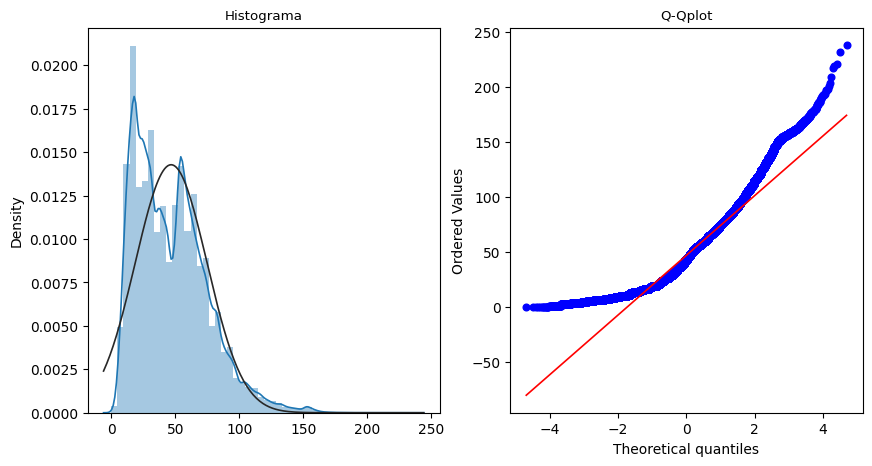

In [ ]:
f, axes = plt.subplots(1,2,figsize=(10, 5))
sns.set_context("paper", font_scale=1)

sns.distplot(ax=axes[0], x=df_Filtrado[Variable], fit = norm)
axes[0].set_title("Histograma")

res = stats.probplot(x=df_Filtrado[Variable], plot = plt)
axes[1].set_title("Q-Qplot")

In [ ]:
# Asimetría y curtosis:
print("Skewness: %f" % df_Filtrado[Variable].skew())
print("Kurtosis: %f" % df_Filtrado[Variable].kurt())

Skewness: 0.861325
Kurtosis: 0.737979


In [ ]:
from scipy.stats import kstest, normaltest, anderson, shapiro

mu, sigma = 0, 0.1 # media y desviación típica
data = df_Filtrado[Variable].dropna()

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
print(p)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con SH')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con DA')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))

******Kolmogorov*********************************************
0.0
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.99893
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.94234
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 55682.68591


### Variable categórica

In [ ]:
frecuencia_estacion = pd.value_counts(df['Estacion']).reset_index()
frecuencia_estacion.columns = ['Estacion', 'Frecuencia']
print(frecuencia_estacion)


                 Estacion  Frecuencia
0              Guaymaral        75408
1                  Jazmin       75408
2   CentroAltoRendimiento       75408
3           CiudadBolivar       75408
4               Fontibon        75408
5                 Bolivia       75408
6                  Colina       75408
7       CarvajalSevillana       75408
8                 Kennedy       75408
9            SanCristobal       75216
10                Usaquen       75216
11                  Tunal       75216
12                   Suba       75216
13             Las Ferias       75216
14           PuenteAranda       75216
15          MovilFontibon       75216
16               Movil7ma       75216
17            MinAmbiente       75216
18                   Usme       75212


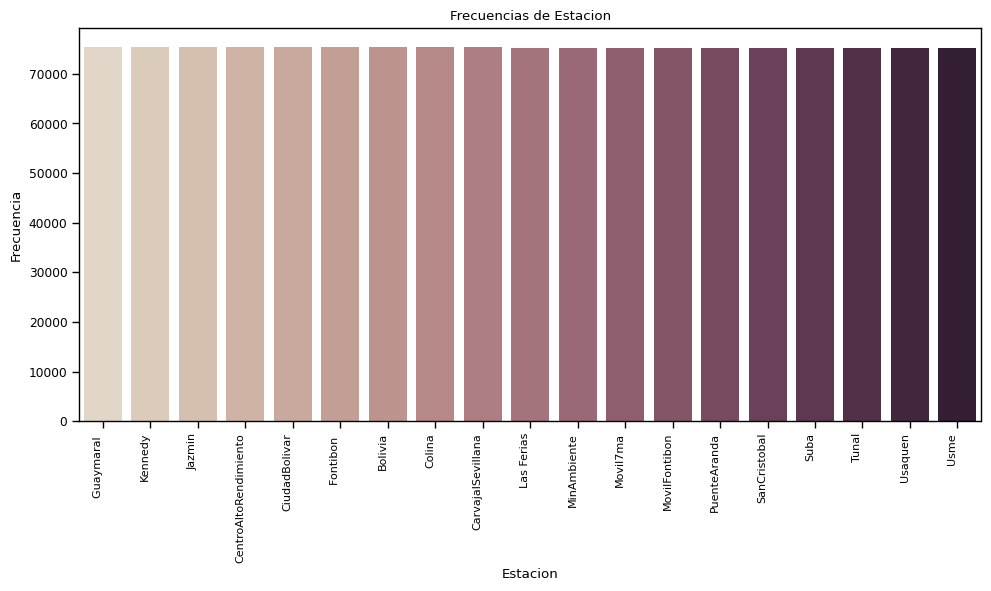

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Estacion", palette="ch:.25")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

plt.title('Frecuencias de Estacion')
plt.xlabel('Estacion')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Relacion de Variables numericas

In [ ]:
df_Filtrado = df_Filtrado.set_index('index')

In [ ]:
columnas_continuas = df_Filtrado.select_dtypes(include='number').columns
columnas_continuas

Index(['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)', 'NO2(ppb)', 'NOX(ppb)',
       'CO(ppm)', 'OZONO(ppb)', 'Vel Viento(m/s)', 'Dir Viento(Grados)',
       'Temperatura(°C)', 'Precipitacion(mm)', 'ICA', 'IBOCA'],
      dtype='object')

In [ ]:
for i, variable in enumerate(columnas_continuas):
  print(i)
  print(variable)
  break

0
PM10(µg/m3)


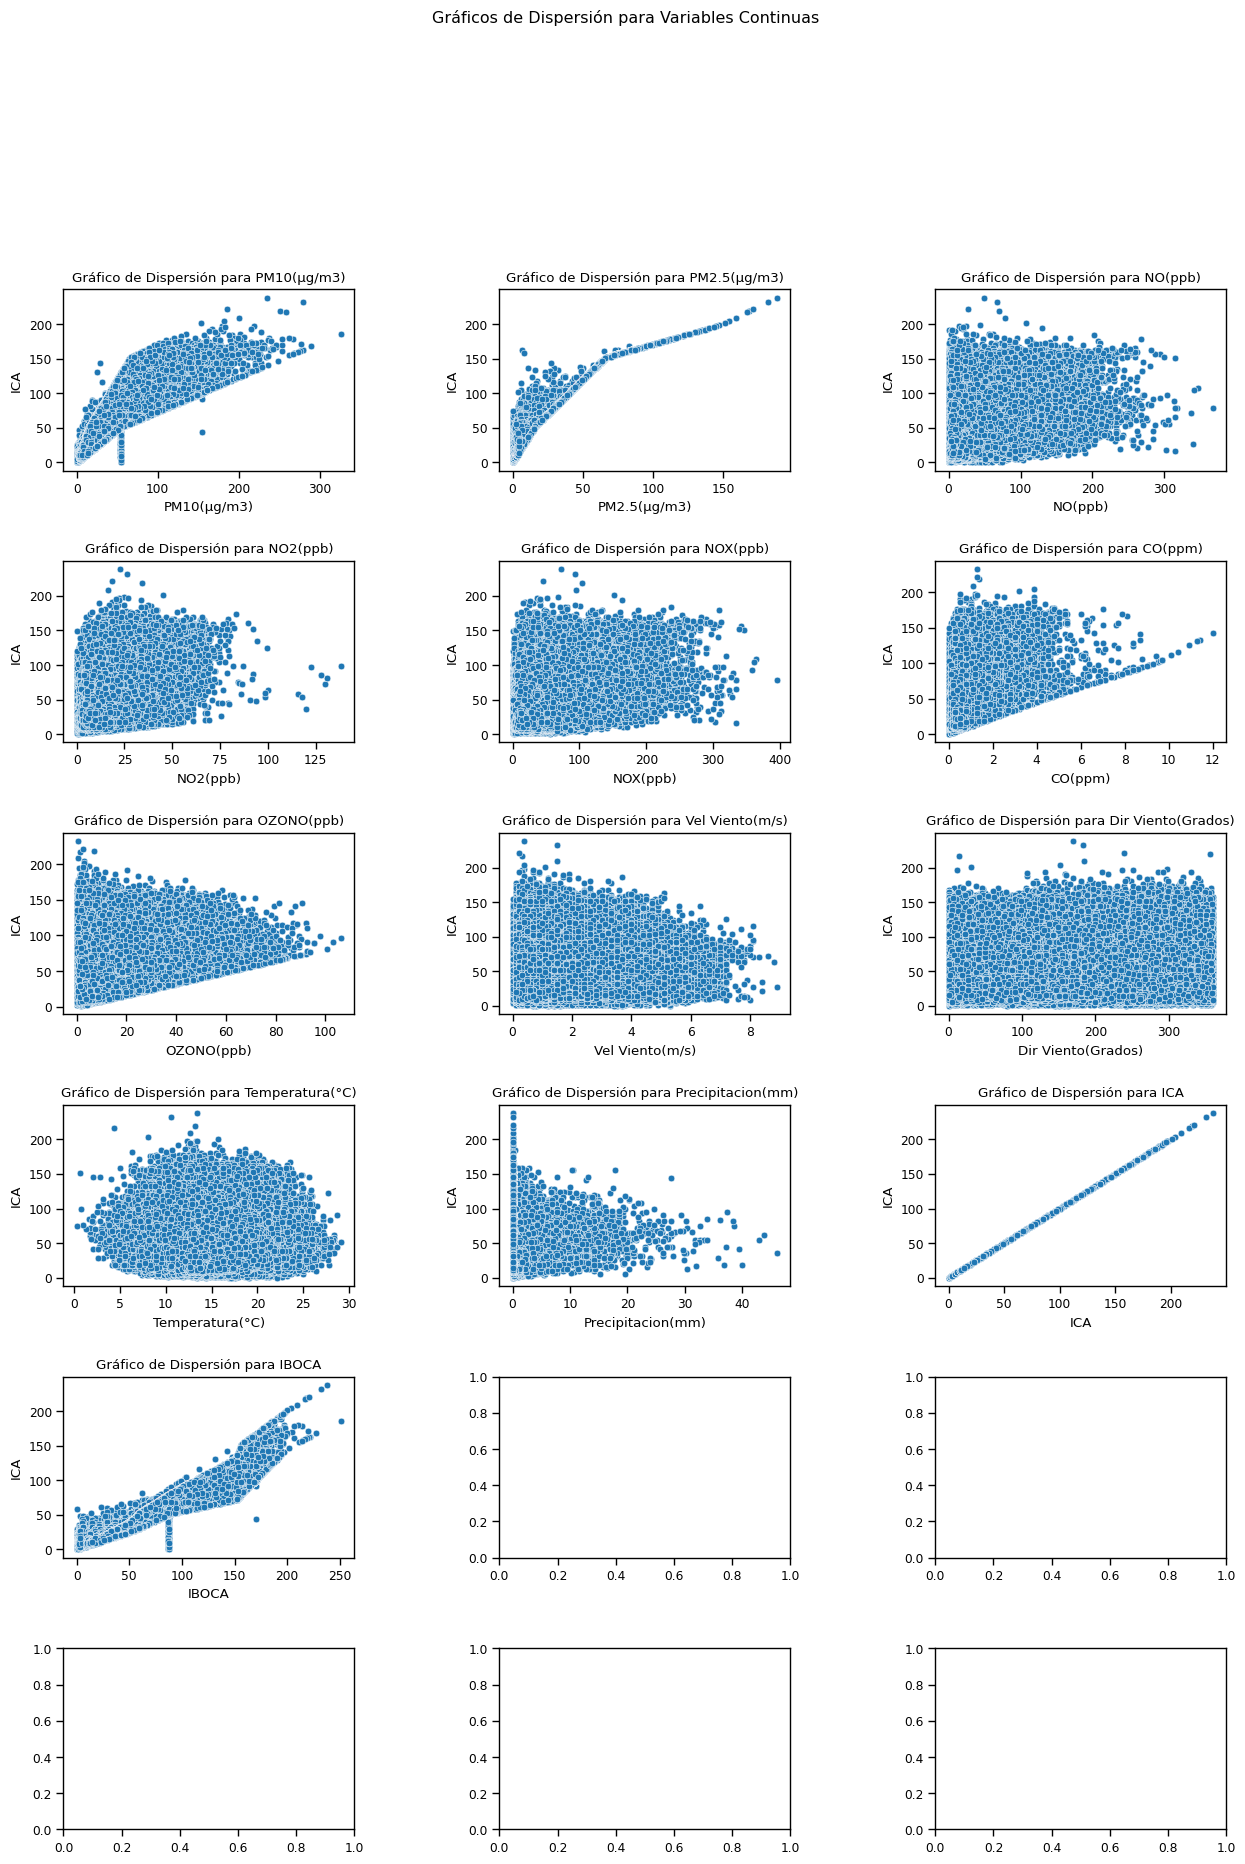

In [ ]:
# Determinar el número de filas y columnas para los subgráficos
num_rows = 6  # Puedes ajustar según el número deseado de filas
num_cols = (len(columnas_continuas) + num_rows - 1) // num_rows

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Ajustar el espaciado entre subgráficos
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterar a través de las columnas y agregar gráficos de dispersión en los subgráficos
for i, variable in enumerate(columnas_continuas):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=variable, y=Variable, data=df_Filtrado, ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de Dispersión para {variable}')

# Añadir título a la figura
fig.suptitle('Gráficos de Dispersión para Variables Continuas', y=1.02)

# Mostrar la figura
plt.show()







## Relacion con variables Categoricas

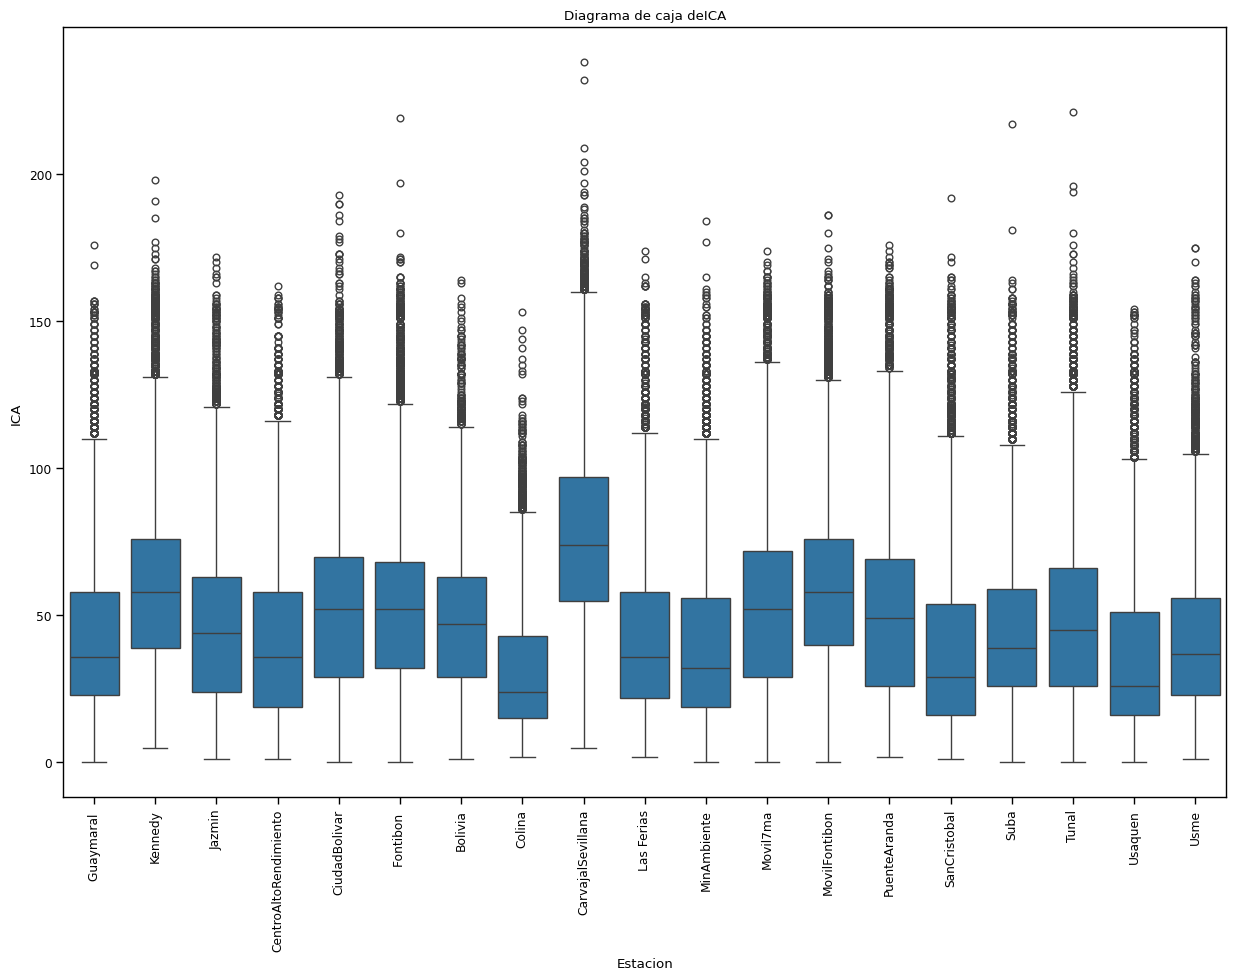

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=df_Filtrado[Variable],x=df_Filtrado['Estacion'])
plt.title('Diagrama de caja de'+Variable)
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)
plt.show()

***Relacion entre zonas***

In [ ]:
#Filtros por Zona
filtroNorocidente = df_Filtrado['Zonas']=='Noroccidente'
filtroCentroOriente = df_Filtrado['Zonas']=='Centro Oriente'
filtroSurOriente = df_Filtrado['Zonas']=='Suroriente'
filtroSuroccidente = df_Filtrado['Zonas']=='Suroccidente'

In [ ]:
#Dataframe con filtro Noroocidente
dfNoroccidente = df_Filtrado[filtroNorocidente]
dfCentroOriente = df_Filtrado[filtroCentroOriente]
dfSurOriente  = df_Filtrado[filtroSurOriente]
dfSuroccidente  = df_Filtrado[filtroSuroccidente]

([0, 1, 2],
 [Text(0, 0, 'Kennedy'),
  Text(1, 0, 'CiudadBolivar'),
  Text(2, 0, 'CarvajalSevillana')])

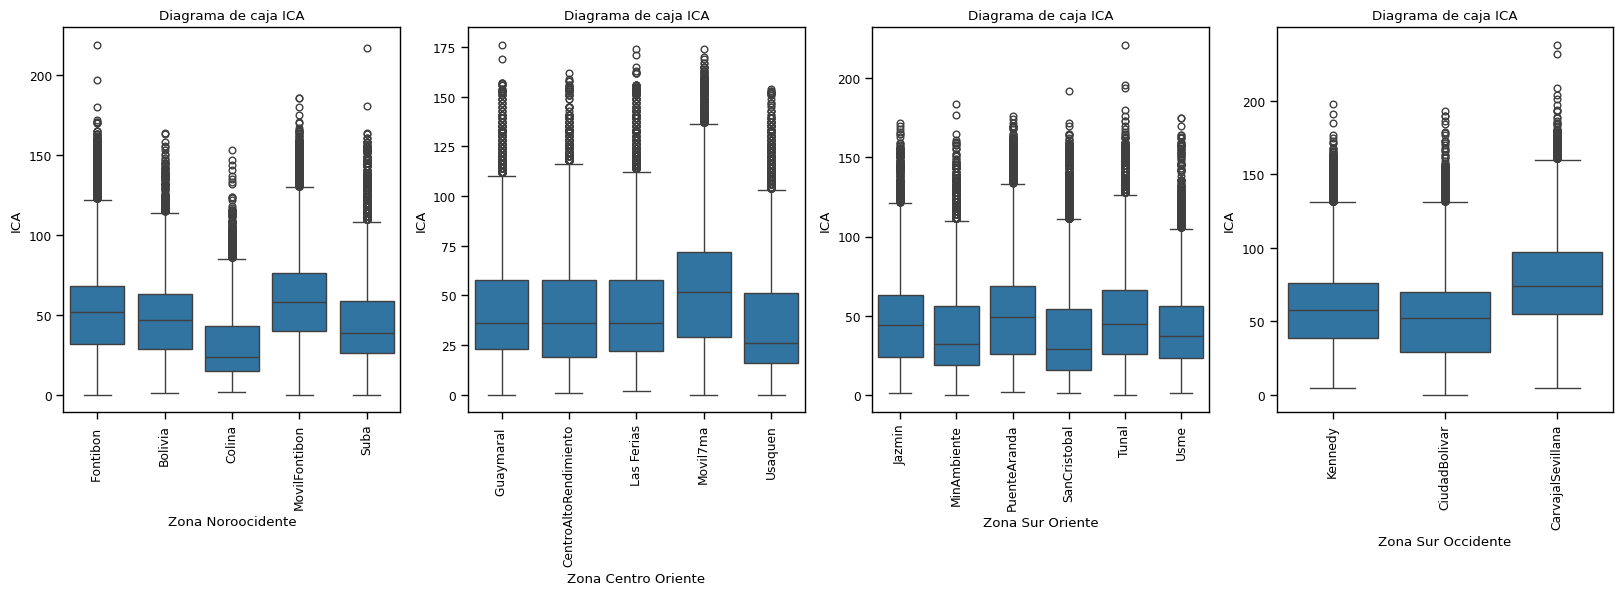

In [ ]:
#Diagrama de Caja y Bigotes por Zonas PM10

plt.figure(figsize=(20,5)) # Tamaño de la figura

plt.subplot(1,4,1) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfNoroccidente[Variable],x=dfNoroccidente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Noroocidente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)

 # Tamaño de la figura
plt.subplot(1,4,2) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfCentroOriente[Variable],x=dfCentroOriente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Centro Oriente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)


plt.subplot(1,4,3) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfSurOriente[Variable],x=dfSurOriente ['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Sur Oriente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)


plt.subplot(1,4,4) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfSuroccidente[Variable],x=dfSuroccidente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Sur Occidente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)

# ***Analisis de serie de Tiempo***

In [ ]:
"""fig = plt.figure(figsize= (5,4))
axes1= fig.add_axes([0,0,1,1])
axes1.plot(PIB_Colombia["Year"],PIB_Colombia["Value"],label ="Colombia")
axes1.plot(PIB_Corea["Year"],PIB_Corea["Value"],label ="Corea del Sur")
axes1.set_xlabel("Año")
axes1.set_ylabel("PIB")
axes1.set_title("PIB Colombia VS PIB Corea")
axes1.legend()
plt.show()"""

'fig = plt.figure(figsize= (5,4))\naxes1= fig.add_axes([0,0,1,1])\naxes1.plot(PIB_Colombia["Year"],PIB_Colombia["Value"],label ="Colombia")\naxes1.plot(PIB_Corea["Year"],PIB_Corea["Value"],label ="Corea del Sur")\naxes1.set_xlabel("Año")\naxes1.set_ylabel("PIB")\naxes1.set_title("PIB Colombia VS PIB Corea")\naxes1.legend()\nplt.show()'

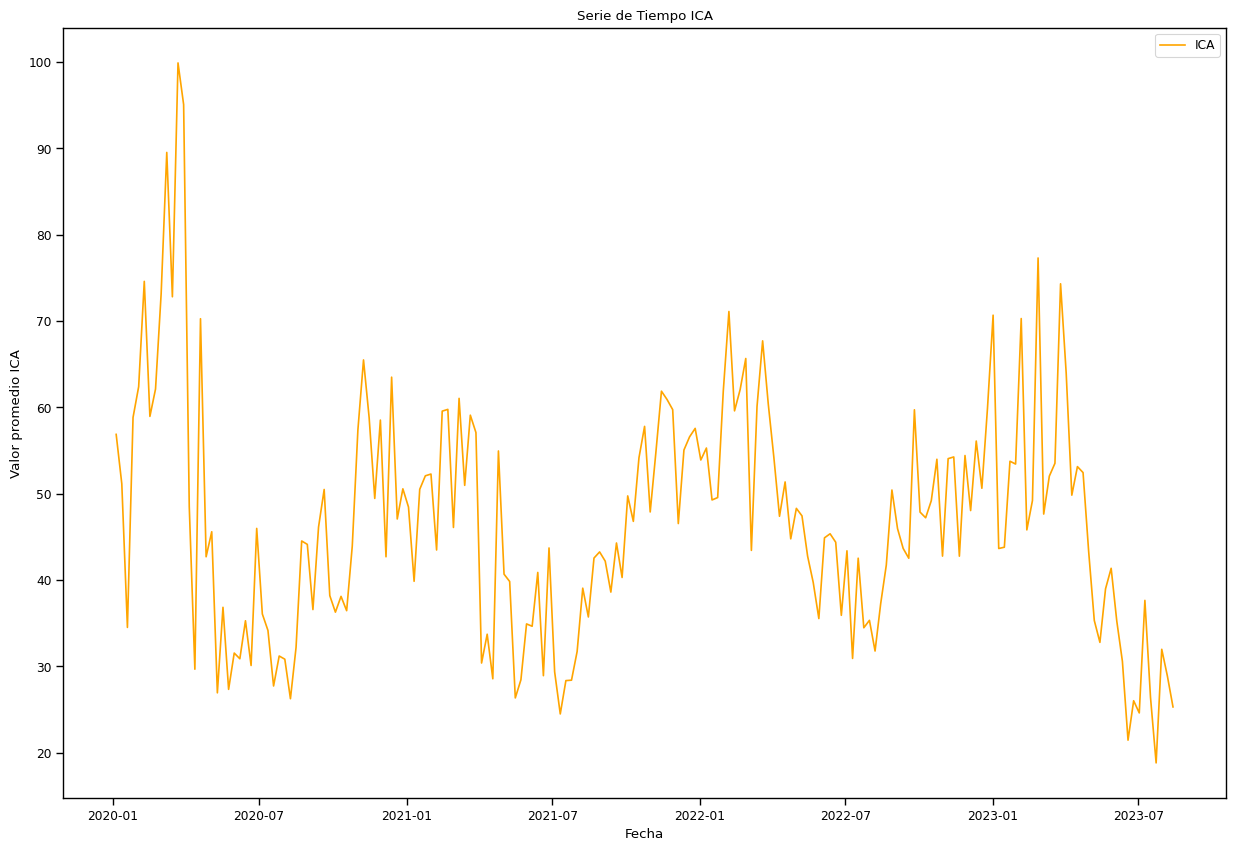

In [ ]:
# Analisis de Serie de Tiempo
datos_mensuales = df_Filtrado.resample('W', on='DateTime').mean()

# Graficar la serie de tiempo por meses
plt.figure(figsize=(15, 10))
plt.plot(datos_mensuales.index, datos_mensuales[Variable], label=Variable,color='orange')
plt.xlabel("Fecha")
plt.ylabel("Valor promedio "+ Variable)
plt.title("Serie de Tiempo "+Variable)
plt.legend()
plt.show()

## **Analisis Cientifico**

In [ ]:
# Scatter plot:
"""sns.set()
cols = columnas_continuas
sns.pairplot(df_Filtrado[cols]) #, size = 2.5
plt.show();"""

'sns.set()\ncols = columnas_continuas\nsns.pairplot(df_Filtrado[cols]) #, size = 2.5\nplt.show();'

**Headmap metodos de correlacion de Person,Spearman y Kendall**

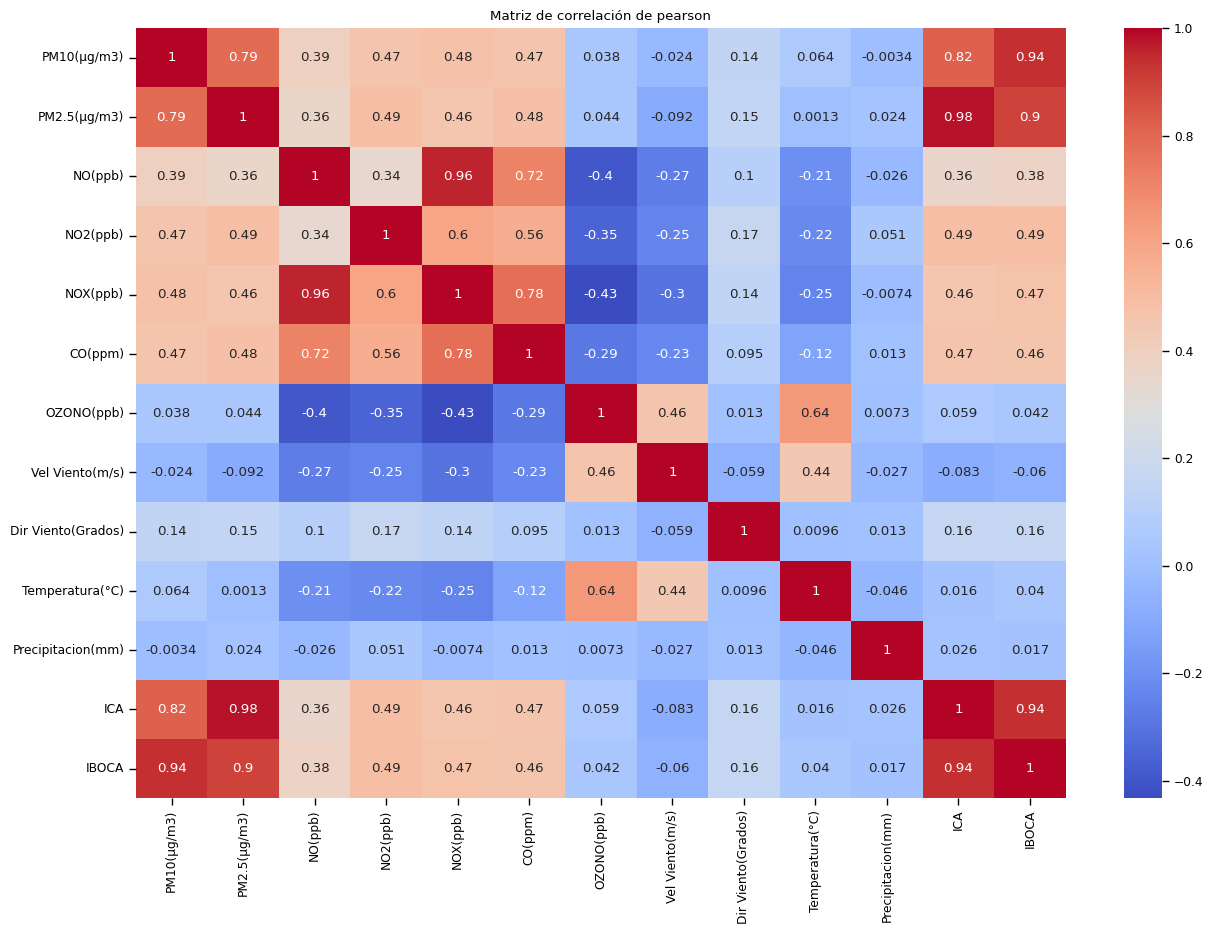

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de pearson')
plt.show()

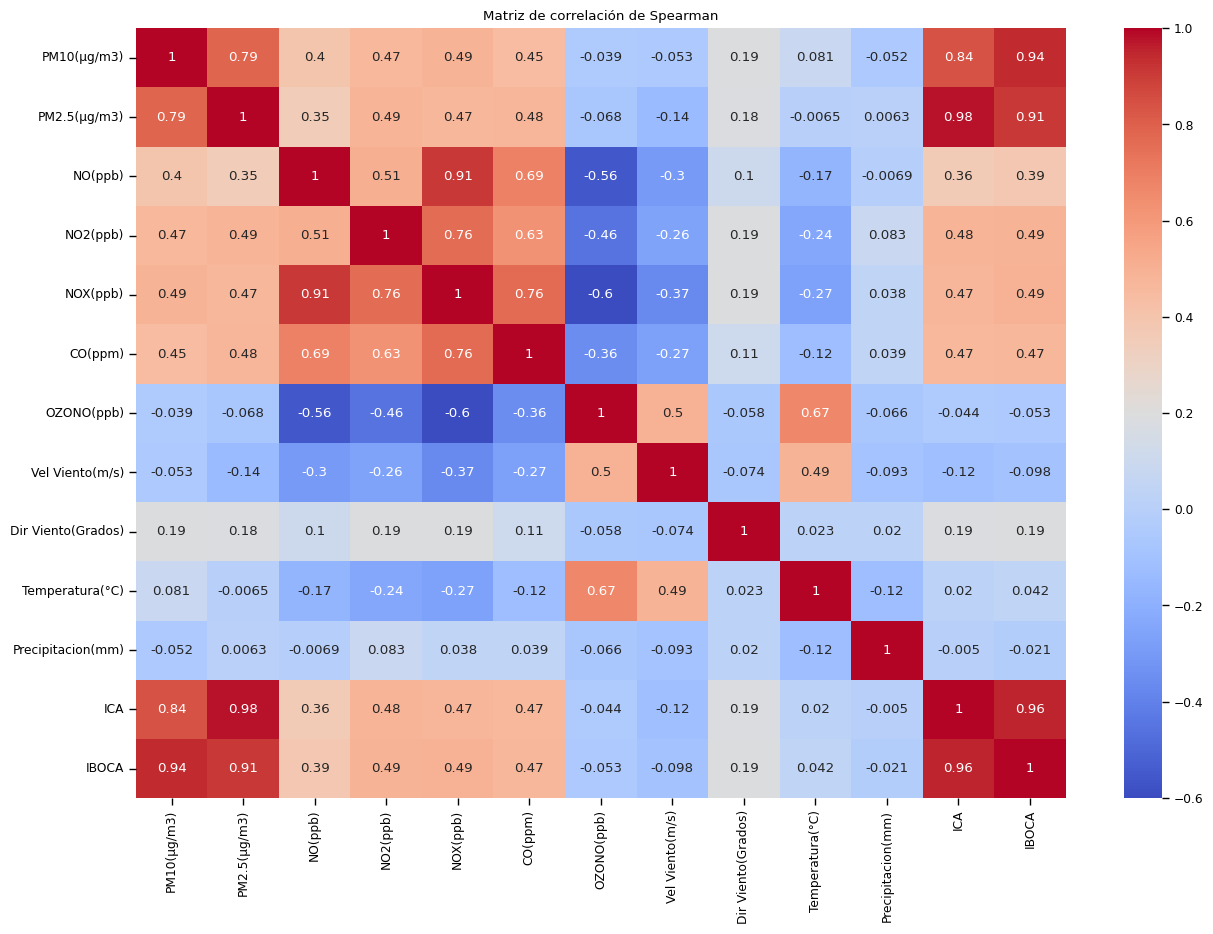

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de Spearman')
plt.show()

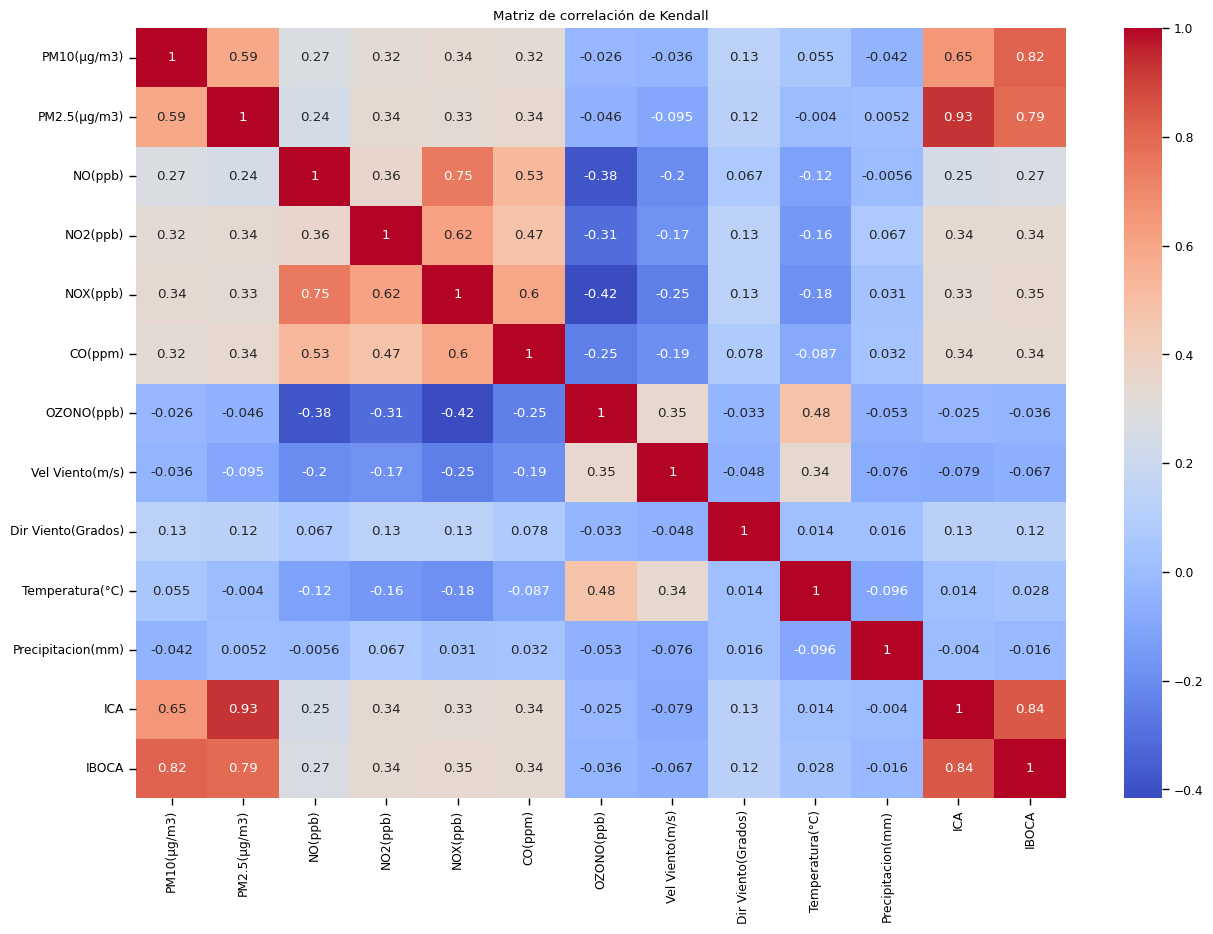

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de Kendall')
plt.show()

In [ ]:
from scipy.stats import spearmanr

for x in columnas_continuas:
  if x != Variable:
    df_cleaned = df_Filtrado[[Variable, x]].dropna()
    # Supongamos que df es tu DataFrame y 'Variable1' y 'Variable2' son las variables de interés
    correlation_spearman, p_value = spearmanr(df_cleaned[Variable], df_cleaned[x])

    print("Relacion entre: "+Variable+" VS "+x )
    print(f"Coeficiente de correlación de Spearman: {correlation_spearman}")
    print(f"Valor p: {p_value}")

    # Evaluación
    if p_value < 0.05:
        print("La correlación es estadísticamente significativa.")
    else:
        print("La correlación no es estadísticamente significativa.")

Relacion entre: ICA VS PM10(µg/m3)
Coeficiente de correlación de Spearman: 0.8434954456263982
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS PM2.5(µg/m3)
Coeficiente de correlación de Spearman: 0.9784969528760429
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS NO(ppb)
Coeficiente de correlación de Spearman: 0.3569569424352166
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS NO2(ppb)
Coeficiente de correlación de Spearman: 0.4816620382858615
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS NOX(ppb)
Coeficiente de correlación de Spearman: 0.4747992286657335
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS CO(ppm)
Coeficiente de correlación de Spearman: 0.46763404076652587
Valor p: 0.0
La correlación es estadísticamente significativa.
Relacion entre: ICA VS OZONO(ppb)
Coeficiente de correlación de Spearm

In [ ]:
# Matriz de correlación
"""k = 10 # Número de variables.
cols = correlation_matrix .nlargest(k, Variable)[Variable].index
cm = np.corrcoef(df_Filtrado[cols].values.T)
sns.set(font_scale = 0.75)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()"""

"k = 10 # Número de variables.\ncols = correlation_matrix .nlargest(k, Variable)[Variable].index\ncm = np.corrcoef(df_Filtrado[cols].values.T)\nsns.set(font_scale = 0.75)\nhm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},\n                 yticklabels = cols.values, xticklabels = cols.values)\nplt.show()"

## Limpieza de datos

### Datos faltantes

In [ ]:
#Contabilizamos valores nulos, e identificamos participación en el total de registros por columnas
resumen_NaN_df= pd.DataFrame(df.isnull().sum())
resumen_NaN_df.columns=['Nulos']
resumen_NaN_df['Registros']=df.shape[0]
resumen_NaN_df['% Nulos']=resumen_NaN_df.Nulos/resumen_NaN_df.Registros
resumen_NaN_df['% Nulos']=resumen_NaN_df['% Nulos'].apply("{:.2%}".format)
resumen_NaN_df

,Nulos,Registros,% Nulos
DateTime,0,1430828,0.00%
Estacion,0,1430828,0.00%
PM10(µg/m3),456716,1430828,31.92%
PM2.5(µg/m3),467726,1430828,32.69%
NO(ppb),713955,1430828,49.90%
NO2(ppb),719254,1430828,50.27%
NOX(ppb),713977,1430828,49.90%
SO2(ppb),881342,1430828,61.60%
CO(ppm),682461,1430828,47.70%
OZONO(ppb),583458,1430828,40.78%


DataFrame Filtrado

In [ ]:
#Contabilizamos valores nulos, e identificamos participación en el total de registros por columnas Filtrado
resumen_NaN_df= pd.DataFrame(df_Filtrado.isnull().sum())
resumen_NaN_df.columns=['Nulos']
resumen_NaN_df['Registros']=df_Filtrado.shape[0]
resumen_NaN_df['% Nulos']=resumen_NaN_df.Nulos/resumen_NaN_df.Registros
resumen_NaN_df['% Nulos']=resumen_NaN_df['% Nulos'].apply("{:.2%}".format).sort_values(ascending = False)
resumen_NaN_df.sort_values(by='Nulos', ascending=True, inplace=True)
resumen_NaN_df

,Nulos,Registros,% Nulos
DateTime,0,523262,0.00%
Estacion,0,523262,0.00%
ICA,0,523262,0.00%
IBOCA,0,523262,0.00%
Zonas,0,523262,0.00%
PM2.5(µg/m3),19471,523262,3.72%
PM10(µg/m3),41289,523262,7.89%
NOX(ppb),74860,523262,14.31%
NO2(ppb),74866,523262,14.31%
NO(ppb),74874,523262,14.31%


# Tratamiento de faltantes



In [ ]:
df_Filtrado.head()

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm),ICA,IBOCA,Zonas
index,,,,,,,,,,,,,,,,
43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,1.4,0.6,273.0,11.0,0.0,39.0,50.0,Centro Oriente
43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,1.6,0.6,346.0,11.1,0.0,56.0,63.0,Centro Oriente
43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,1.8,0.6,322.0,10.5,0.0,58.0,66.0,Centro Oriente
43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,1.4,0.6,292.0,9.6,0.0,52.0,59.0,Centro Oriente
43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,1.5,0.6,239.0,8.8,0.0,54.0,61.0,Centro Oriente


In [ ]:
columnas_categoricas = df_Filtrado.select_dtypes(include='object').columns
df_Filtrado_Continuas = df_Filtrado.drop(columns=columnas_categoricas).reset_index()


In [ ]:
yearTest=2020

In [ ]:
df_Filtrado_Continuas= df_Filtrado_Continuas[df_Filtrado_Continuas['DateTime'].dt.year == yearTest].reset_index()

In [ ]:
df_Filtrado_Continuas.drop(['index','level_0'], axis=1, inplace=True)
df_Filtrado_Continuas

,DateTime,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm),ICA,IBOCA
0,2020-01-01 01:00:00,22.0,12.0,37.7,10.0,47.7,NaN,1.4,0.6,273.0,11.0,0.0,39.0,50.0
1,2020-01-01 02:00:00,20.0,18.0,31.3,10.6,41.8,NaN,1.6,0.6,346.0,11.1,0.0,56.0,63.0
2,2020-01-01 03:00:00,27.0,19.0,3.5,10.4,13.9,NaN,1.8,0.6,322.0,10.5,0.0,58.0,66.0
3,2020-01-01 04:00:00,16.0,16.0,5.0,9.0,14.1,NaN,1.4,0.6,292.0,9.6,0.0,52.0,59.0
4,2020-01-01 05:00:00,NaN,17.0,17.9,6.7,24.7,NaN,1.5,0.6,239.0,8.8,0.0,54.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120885,2020-12-30 20:00:00,45.8,23.5,35.0,35.7,70.7,1.3,0.8,NaN,NaN,12.6,NaN,67.0,76.0
120886,2020-12-30 21:00:00,52.8,28.0,34.1,34.4,68.5,1.3,0.6,NaN,NaN,11.9,NaN,76.0,85.0
120887,2020-12-30 22:00:00,55.3,25.3,66.0,37.7,103.8,1.4,0.4,NaN,NaN,11.7,NaN,70.0,89.0
120888,2020-12-30 23:00:00,51.7,33.3,52.0,32.5,84.5,1.0,0.6,NaN,NaN,11.8,NaN,86.0,96.0


In [ ]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [ ]:
# Suponiendo que df_Filtrado_Continuas es tu DataFrame con valores faltantes

# Imprimir datos antes de realizar la imputación
print("Datos antes de realizar la imputación\n", df_Filtrado_Continuas)

# Crear el KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Realizar la imputación
After_imputation = imputer.fit_transform(df_Filtrado_Continuas)

# Convertir el resultado de nuevo a un DataFrame
After_imputation_df = pd.DataFrame(After_imputation, columns=df_Filtrado_Continuas.columns)

# Generar Dataframe en Csv

After_imputation_df.to_csv('/content/drive/MyDrive/Semestre 4/RNA/Proyecto RNA/Entrega 1 Descriptivo/Insumos/after_imputatio_Normal'+str(yearTest)+'Test.csv', index=False, header=True, sep=',')


# Imprimir el conjunto de datos después de realizar la operación
print("\n\nDespués de realizar la imputación\n", After_imputation_df)

Datos antes de realizar la imputación
                   DateTime  PM10(µg/m3)  PM2.5(µg/m3)  NO(ppb)  NO2(ppb)  \
0      2020-01-01 01:00:00         22.0          12.0     37.7      10.0   
1      2020-01-01 02:00:00         20.0          18.0     31.3      10.6   
2      2020-01-01 03:00:00         27.0          19.0      3.5      10.4   
3      2020-01-01 04:00:00         16.0          16.0      5.0       9.0   
4      2020-01-01 05:00:00          NaN          17.0     17.9       6.7   
...                    ...          ...           ...      ...       ...   
120885 2020-12-30 20:00:00         45.8          23.5     35.0      35.7   
120886 2020-12-30 21:00:00         52.8          28.0     34.1      34.4   
120887 2020-12-30 22:00:00         55.3          25.3     66.0      37.7   
120888 2020-12-30 23:00:00         51.7          33.3     52.0      32.5   
120889 2020-12-30 23:59:00         49.7          25.2     25.2      23.6   

        NOX(ppb)  CO(ppm)  OZONO(ppb)  Vel Vient

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
After_imputation_df.columns

Index(['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)', 'NO2(ppb)', 'NOX(ppb)',
       'CO(ppm)', 'OZONO(ppb)', 'Vel Viento(m/s)', 'Dir Viento(Grados)',
       'Temperatura(°C)', 'Precipitacion(mm)'],
      dtype='object')

In [ ]:
#Contabilizamos valores nulos, e identificamos participación en el total de registros por columnas
resumen_NaN_df= pd.DataFrame(After_imputation_df.isnull().sum())
resumen_NaN_df.columns=['Nulos']
resumen_NaN_df['Registros']=df.shape[0]
resumen_NaN_df['% Nulos']=resumen_NaN_df.Nulos/resumen_NaN_df.Registros
resumen_NaN_df['% Nulos']=resumen_NaN_df['% Nulos'].apply("{:.2%}".format)
resumen_NaN_df

,Nulos,Registros,% Nulos
PM10(µg/m3),0,1430828,0.00%
PM2.5(µg/m3),0,1430828,0.00%
NO(ppb),0,1430828,0.00%
NO2(ppb),0,1430828,0.00%
NOX(ppb),0,1430828,0.00%
CO(ppm),0,1430828,0.00%
OZONO(ppb),0,1430828,0.00%
Vel Viento(m/s),0,1430828,0.00%
Dir Viento(Grados),0,1430828,0.00%
Temperatura(°C),0,1430828,0.00%


## Unificacion DF

Se dividio por años la data debido a que el total no se pudo procesar debidos a los altos tiempo

XGBOOST

SVM

LSTM

# **Estandarizacion de variables**

In [ ]:
#DataFrame de variables numericas y valores imputados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
After_imputation_df_Estandar = scaler.fit_transform(After_imputation_df)
After_imputation_df_Estandar

array([[ 0.3231478 ,  1.33663175, -0.56494735, ...,  1.37422152,
        -0.71144813, -0.14036123],
       [ 0.82786165,  2.83008395, -0.52672673, ...,  0.84333735,
        -0.62318885, -0.14036123],
       [ 0.59844626,  2.03943279, -0.63289511, ...,  1.18685064,
        -0.71144813, -0.14036123],
       ...,
       [-0.42015805, -1.08803182, -0.51823326, ...,  0.2916342 ,
        -0.50550982, -0.14036123],
       [-0.89734205, -1.09681683, -0.47151918, ...,  1.18164589,
        -0.47609006, -0.14036123],
       [-0.02556358, -1.10560184, -0.60316796, ..., -0.05187908,
        -0.62318885, -0.02936658]])

In [ ]:
# Estandarización de datos:
low_range = After_imputation_df_Estandar[After_imputation_df_Estandar[:,0].argsort()][:10]
high_range = After_imputation_df_Estandar[After_imputation_df_Estandar[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-1.55805836 -1.47457239 -0.22945529 -0.04446521 -0.20726499 -0.91212311
   0.47328383 -1.08014536  1.19726013  0.21527428  0.02613075]
 [-1.55805836 -1.47457239 -0.7050896  -1.2114104  -0.98672649 -1.12003299
   0.23384777 -1.33033692 -1.75903601 -1.00564572 -0.14036123]
 [-1.55805836 -1.47457239 -0.54371367 -0.92235058 -0.75695326 -0.70421323
   0.46370639 -0.72987718 -0.65562971 -0.74086789 -0.14036123]
 [-1.55805836 -1.47457239 -0.71782981 -1.31846959 -1.03268114 -1.12003299
  -1.0016423   0.4710423  -0.88463856 -1.47636187 -0.14036123]
 [-1.55805836 -1.47457239 -0.17849447 -0.7082322  -0.38224614 -0.08048359
  -0.34079878  0.57111892 -1.13446641  0.40650272 -0.14036123]
 [-1.55805836 -1.47457239 -0.75605042 -1.38270511 -1.09984562 -0.49630335
   0.59779058  0.57111892 -0.78054363 -1.093905   -0.14036123]
 [-1.55805836  0.80074596 -0.64988205 -1.2114104  -0.94077185 -0.39234841
  -0.31685517  1.07150203 -0.78054363  1.75981164 -0.14036123]
 [

In [ ]:
etiquetas_col=['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)', 'NO2(ppb)', 'NOX(ppb)',
       'CO(ppm)', 'OZONO(ppb)', 'Vel Viento(m/s)', 'Dir Viento(Grados)',
       'Temperatura(°C)', 'Precipitacion(mm)']
df_scaled= pd.DataFrame(After_imputation_df_Estandar,columns=etiquetas_col)
df_scaled

,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm)
0,0.323148,1.336632,-0.564947,-0.633291,-0.679184,-0.288393,-0.857981,-0.930030,1.374222,-0.711448,-0.140361
1,0.827862,2.830084,-0.526727,-0.943762,-0.749883,-0.496303,-0.446151,-0.829954,0.843337,-0.623189,-0.140361
2,0.598446,2.039433,-0.632895,-1.082939,-0.884212,-0.704213,-0.302489,-0.930030,1.186851,-0.711448,-0.140361
3,0.873745,3.005784,-0.637142,-1.307764,-0.958447,-0.912123,0.013567,-1.080145,1.467907,-0.740868,-0.140361
4,0.185499,0.633831,-0.649882,-1.371999,-0.993796,-1.120033,0.061454,-0.729877,0.968251,-0.887967,-0.140361
...,...,...,...,...,...,...,...,...,...,...,...
266515,-0.938637,-1.008967,-0.437545,0.169653,-0.304477,0.335336,-0.321644,-0.429647,0.151106,-0.152473,-0.140361
266516,0.015731,-1.052892,-0.327130,0.191065,-0.212567,0.335336,-0.513193,-0.129417,0.879771,-0.299572,-0.140361
266517,-0.420158,-1.088032,-0.518233,-0.087289,-0.460016,-0.288393,-0.369531,0.421004,0.291634,-0.505510,-0.140361
266518,-0.897342,-1.096817,-0.471519,-0.140818,-0.438806,-0.288393,-0.340799,-0.329571,1.181646,-0.476090,-0.140361


Text(0.5, 1.0, 'Q-Qplot')

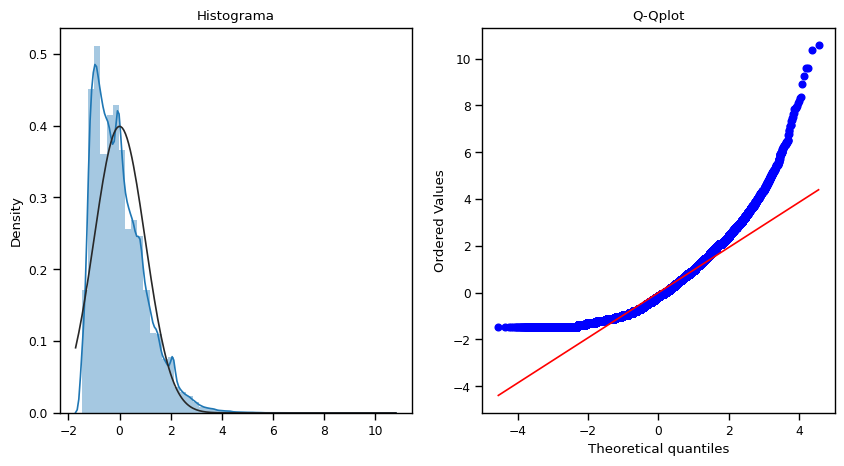

In [ ]:
f, axes = plt.subplots(1,2,figsize=(10, 5))
sns.set_context("paper", font_scale=1)

sns.distplot(ax=axes[0], x=df_scaled[Variable], fit = norm)
axes[0].set_title("Histograma")

res = stats.probplot(x=df_scaled[Variable], plot = plt)
axes[1].set_title("Q-Qplot")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Crear el objeto MinMaxScaler
# Manejar infinitos y valores muy grandes
After_imputation_df.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar los datos del DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(After_imputation_df), columns=After_imputation_df.columns)

Text(0.5, 1.0, 'Q-Qplot')

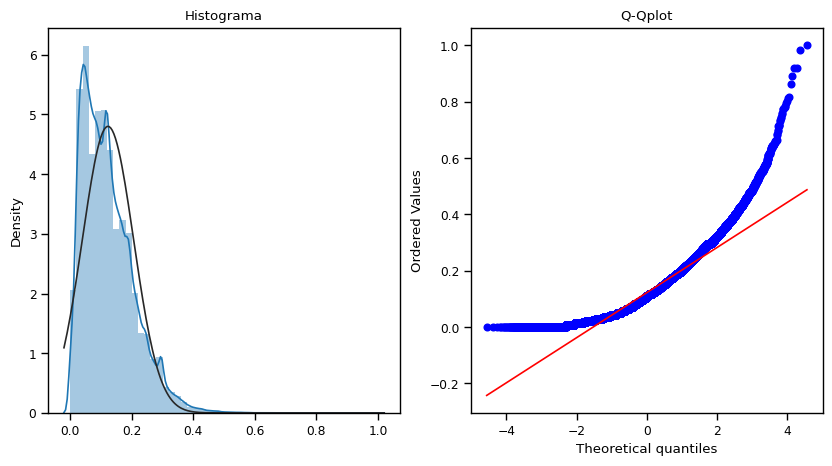

In [ ]:
f, axes = plt.subplots(1,2,figsize=(10, 5))
sns.set_context("paper", font_scale=1)

sns.distplot(ax=axes[0], x=df_normalized[Variable] , fit = norm)
axes[0].set_title("Histograma")

res = stats.probplot(x=df_normalized[Variable] , plot = plt)
axes[1].set_title("Q-Qplot")

In [ ]:
df_transformado= df_scaled
df_transformado['Test'] = np.log(df_scaled[Variable])

In [ ]:
df_transformado= df_Filtrado
#df_transformado =df_Filtrado[Variable].replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
df_transformado['Test'] = np.log(df_transformado[Variable])
df_transformado['Test']

index
61368      3.465736
61369      3.891820
61370      3.688879
61371      3.931826
61372      3.178054
             ...   
1430823    1.667707
1430824    1.568616
1430825    1.481605
1430826    1.458615
1430827    1.435085
Name: Test, Length: 266520, dtype: float64

OverflowError: ignored

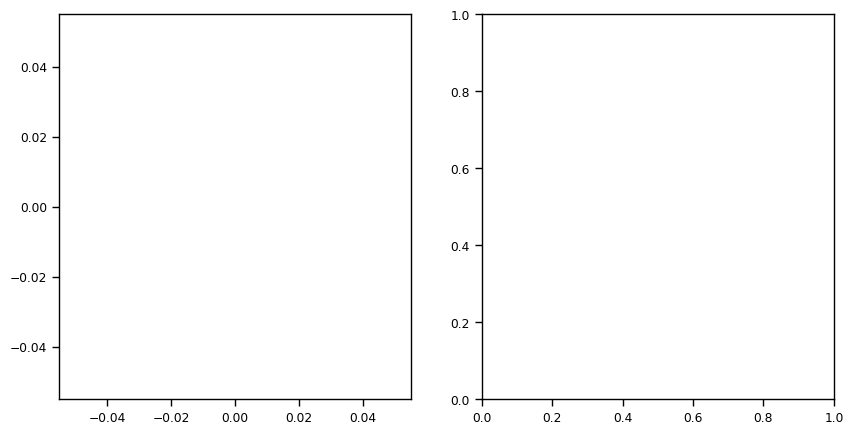

In [ ]:
f, axes = plt.subplots(1,2,figsize=(10, 5))
sns.set_context("paper", font_scale=1)

sns.distplot(ax=axes[0], x=df_transformado['Test'] , fit = norm)
axes[0].set_title("Histograma")

res = stats.probplot(x=df_transformado['Test'] , plot = plt)
axes[1].set_title("Q-Qplot")

# Ingenieria de caracteristicas posterior a la imputacion de los datos